In [1]:
# Mount your Googledrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
### Take a Random Sample from the Clean dataset and analysis

In [7]:
# Import Libraries
#for data analysis

import pandas as pd
from pandas import Series, DataFrame
import numpy as np

# for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import plotly.express as px



In [4]:
file = '/content/drive/MyDrive/ny_motor_vehicle_collisions.csv'

motor_collision = pd.read_csv(file)

In [5]:
# Take random Sampling for analysis
sample_df = motor_collision.sample(n= 100 , random_state = 10301988)
sample_df.head(10)

,Unnamed: 0,Unnamed: 0.1,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,VEHICLE_ID,VEHICLE_TYPE,VEHICLE_MAKE,MONTH,YEAR
87490,87490,398632,17886013,3731658,2017-08-14,13:50,03b2041c-7793-4b66-b848-6a47a32c936e,Sport Utility Vehicle,HOND,8,2017
194908,194908,888694,17846901,3766183,2017-10-05,8:35,6898fe98-d970-4dfd-a93b-d594e274ac03,Sport Utility Vehicle,FORD,10,2017
72559,72559,330409,17687609,4025590,2018-01-24,16:40,74d8254c-5dc2-4d45-a9a7-4b2c8265cdac,Sedan,FORD,1,2018
114016,114016,519274,17837192,3903187,2018-05-13,11:04,73f152ef-3cc5-4a68-9eee-b492e15ca72a,Sedan,VOLK,5,2018
179716,179716,819641,17793757,3883536,2018-04-18,9:00,e8827645-6bae-4e21-9715-e7fb08425863,Sport Utility Vehicle,FORD,4,2018
99146,99146,451863,17701400,3835632,2018-01-26,18:30,aa4e3020-2456-431c-9dd0-258159aa60aa,Sport Utility Vehicle,FORD,1,2018
90166,90166,410445,17846592,3799435,2017-11-28,7:55,4a5e0571-725a-4ffa-8ac2-67b0f207b3d5,Sport Utility Vehicle,FORD,11,2017
178693,178693,814886,18661316,3917131,2018-06-04,11:00,8b10ee66-f68f-49c3-994f-d46a617f7da2,Sedan,HOND,6,2018
56474,56474,256616,17567609,3702369,2017-06-30,9:30,c8855b5b-144b-42ff-b55d-785b648736a1,Sport Utility Vehicle,HOND,6,2017
80830,80830,368310,17821267,3901639,2018-05-16,22:00,46d692c4-37fe-4af3-b062-98c11e2e60d5,Sedan,VOLK,5,2018


In [12]:
yearly_accident = sample_df.groupby(["YEAR","VEHICLE_MAKE"]).size().unstack()

Text(0.5, 1.0, 'Yearly Accident Count by Each Vehicle Make')

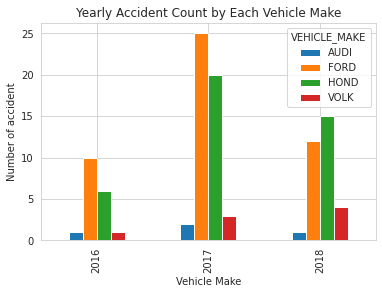

In [13]:
# Plot of the accident count in each year

yearly_accident.plot.bar()
plt.xlabel("Vehicle Make")
plt.ylabel("Number of accident")
plt.title("Yearly Accident Count by Each Vehicle Make")

In [15]:
data = sample_df.groupby(['MONTH','VEHICLE_MAKE',])['YEAR'].count()
accident_by_month = data.unstack().fillna(0)
accident_by_month

VEHICLE_MAKE,AUDI,FORD,HOND,VOLK
MONTH,,,,
1,0.0,5.0,6.0,0.0
2,2.0,1.0,5.0,0.0
3,0.0,3.0,1.0,2.0
4,1.0,4.0,2.0,0.0
5,0.0,3.0,4.0,2.0
6,0.0,6.0,6.0,1.0
7,0.0,3.0,0.0,1.0
8,1.0,3.0,5.0,1.0
9,0.0,4.0,6.0,1.0


In [17]:
 # You should consider re-indexing it based on axis 0 (indexes)
accident_by_month.insert(0,'MONTH_NAME',['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
accident_by_month=accident_by_month.set_index('MONTH_NAME')
accident_by_month

VEHICLE_MAKE,AUDI,FORD,HOND,VOLK
MONTH_NAME,,,,
Jan,0.0,5.0,6.0,0.0
Feb,2.0,1.0,5.0,0.0
Mar,0.0,3.0,1.0,2.0
Apr,1.0,4.0,2.0,0.0
May,0.0,3.0,4.0,2.0
Jun,0.0,6.0,6.0,1.0
Jul,0.0,3.0,0.0,1.0
Aug,1.0,3.0,5.0,1.0
Sep,0.0,4.0,6.0,1.0


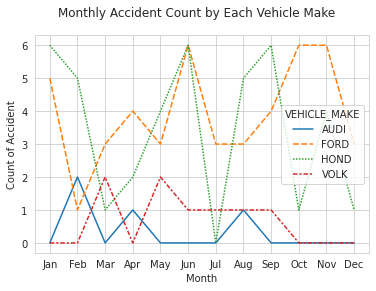

In [18]:

sns.lineplot(data = accident_by_month)
plt.suptitle("Monthly Accident Count by Each Vehicle Make")
plt.xlabel("Month")
plt.ylabel("Count of Accident")
plt.savefig("monthly_accident.png")


In [21]:
acccident_count_of_vehicle_type = sample_df.groupby(['VEHICLE_TYPE']).agg(count = ('COLLISION_ID','count'))
acccident_count_of_vehicle_type

,count
VEHICLE_TYPE,
Bus,2
Passenger Vehicle,7
Sedan,48
Sport Utility Vehicle,33
Truck,8
Van,2


In [24]:
fig = px.pie(data_frame= sample_df, values= 'COLLISION_ID', names= 'VEHICLE_TYPE' , color= 'VEHICLE_TYPE',title = "Percentage of Vehicle Type Involve in Accidents")
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

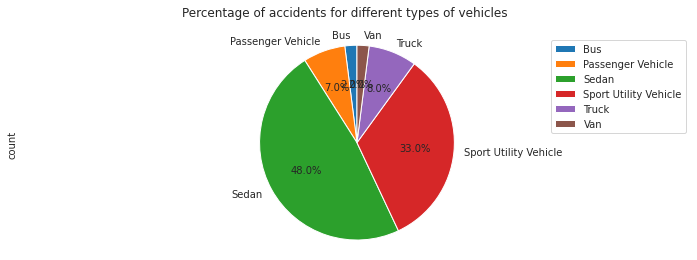

In [25]:
sample_df.groupby(['VEHICLE_TYPE']).agg(count = ('COLLISION_ID','count')).plot(kind = 'pie', startangle=90, y = 'count', autopct='%1.1f%%',figsize =(12,4));
plt.suptitle('Percentage of accidents for different types of vehicles');
plt.axis('equal');
